In [1]:
import numpy as np
from random import *
from numpy.random import *
import matplotlib.pyplot as plt

# Monte Carlo Simulation of an Ideal Gas
The quantum states of a particle in a cubic box of length $L$ has energy as a function of three quantum numbers $n_x$, $n_y$, $n_z$.
$$
E(n_x, n_y, n_z) = \frac{\pi^2 \hbar^2}{2mL^2}(n_x^2 + n_y^2 + n_z^2)
$$
The total energy of an ideal gas with $N$ atoms confined in this box is therefore:
$$
E = \sum_{i=1}^N E(n_x^{(i)}, n_y^{(i)}, n_z^{(i)})
$$
The move set consists of all moves which change one of the three quantum numbers by $\pm 1$. The change in energy if $n_x$ changes by $\pm1$ is
$$
\Delta E = \frac{\pi^2 \hbar^2}{2mL^2}(\pm 2n_x + 1)
$$


In [2]:
# Constants
m = 1 
hbar = 1 
L = 1
N = 1000                    # number of particles
nx, ny, nz = 1,1,1          # initial state

# Monte Carlo constants 
moves = 250000


def energy(nx, ny, nz):
    factor = (np.pi*hbar)**2/(2*m*L*L)
    return factor*(nx*nx + ny*ny + nz*nz)

for i in range(moves):
    E = energy(nx,ny,nz)
    


In [3]:
class Particle:
    def __init__(self, n):
        self.n = n
    def energy(self):
        factor = (np.pi*hbar)**2/(2*m*L*L)
        return factor*(self.n[0]**2 + self.n[1]**2 + self.n[2]**2)
    def get_n(self):
        return self.n
    def set_n(self, new):
        self.n = new


hits 229216
downs 114616
ups 114600


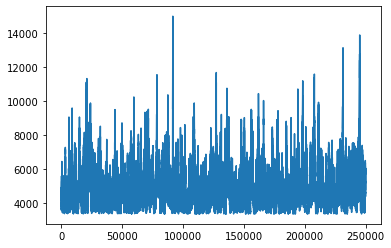

In [12]:
# Constants

m = 1 
hbar = 1 
L = 1
T=1000
beta = 1/T
factor = (np.pi*hbar)**2/(2*m*L*L)
N = 10

moves = 250000
init = [5,5,5]  #nx, ny, nz

particleList = [Particle(init) for i in range(N)]
E = sum([particleList[i].energy() for i in range(N)])
E_list = [E]
strikes = 0
U, D = 0,0
for move in range(moves): 
    j = randrange(N)
    state= particleList[j].get_n()
    select_n = randrange(3)
    if random()<0.5:
        dn = 1
        dE = (2*state[select_n] + 1)*np.pi*np.pi/2
    else:
        dn = -1 
        dE = (-2*state[select_n] + 1)*np.pi*np.pi/2

    a = state[select_n] + dn
    # print(dE, np.exp(-dE/T), E, dn, state)
    if state[select_n] > 1 or dn == 1:
        Toss = random()
        # print(a)
        # print(Toss, np.exp(-dE/T), dE)
        if Toss < min(1,np.exp(-dE/T)):
            # print(np.exp(-dE/T), Toss, dE, Toss < np.exp(-dE/T))
            if dn == 1:
                U += 1
                #print(dE, dn)
            if dn == -1:
                D += 1
                #print(dE, dn)
            strikes += 1
            #print(state, '1')
            state[select_n] += dn
            #print(state, '2')
            #print(particleList[j].get_n(), state)
            particleList[j].set_n(state)
            #print(particleList[j].get_n(), state)
            E += dE
           
    E_list.append(E)

plt.plot(E_list)
print('hits', strikes)
print('downs', U)
print('ups', D)


14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
24.674011002723393 1
14.804406601634037 1
24.674011002723393 1
14.804406601634037 1
34.54361540381275 1
-14.804406601634037 -1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
-14.804406601634037 -1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
24.674011002723393 1
34.54361540381275 1
14.804406601634037 1
44.41321980490211 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
14.804406601634037 1
-24.674011002723393 -1
14.804406601634037 1
-14.804406601634037 -1
14.804406601634037 1
14.804406601634037 1
24.674011002723393 1
-44.41321980490211 -1
-14.804406601634037 -1
34.54361540381275 1
14.804406601634037 1
-14.804406601634037 -1
24.674011002723393 1
14.804406601634037 1
-34.54361540381275 -1
-14.804406601634037 -1
14.804406601634037 1
14.804406601634037 1
2

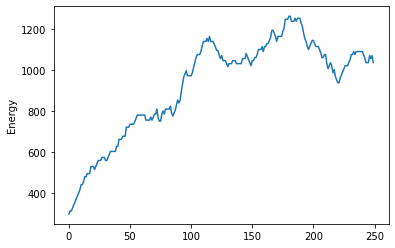

hits 154
downs 57
ups 97


In [14]:
from random import random,randrange
from math import exp,pi
from numpy import ones
from pylab import plot,ylabel,show

T = 100.0
N = 20
steps = 250

# Create a 2D array to store the quantum numbers
n = ones([N,3],int)

# Main loop
eplot = []
E = 3*N*pi*pi/2
up=0
down = 0
hits = 0
for k in range(steps):
    
    # Choose the particle and the move
    i = randrange(N)
    j = randrange(3)
    if random()<0.5:
        dn = 1
        dE = (2*n[i,j]+1)*pi*pi/2
    else:
        dn = -1
        dE = (-2*n[i,j]+1)*pi*pi/2

    #print(E, dn, n[i,j])
    # Decide whether to accept the move
    
    
    #print(dE, np.exp(-dE/T), E, dn, n[i,])
    
    if n[i,j]>1 or dn==1:
        toss = random()
        #print(n[i,j])
        #print(toss, np.exp(-dE/T), dE)
        if toss < np.exp(-dE/T):
            # print(toss, np.exp(-dE/T), toss < np.exp(-dE/T))
            #print('step')
            hits += 1
            n[i,j] += dn
            E += dE
            if dn == 1:
                up += 1
                print(dE, dn)
            if dn == -1:
                down += 1
                print(dE, dn)
    eplot.append(E)

# Make the graph
plot(eplot)
ylabel("Energy")
show()
print('hits', hits)
print('downs', down)
print('ups', up)
